In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


e=pd.read_csv("/Users/sofianeagounikaci/Documents/linear_regression/car details v4.csv")

e.info()




y=e["Price"]
e.drop('Price', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
var_num=e.select_dtypes(["int64","float64"])
var_cat=e.select_dtypes("object")
x = pd.concat([var_cat, var_num], axis=1)


      Make  Model  Fuel Type  Transmission  Location  Color  Owner  \
0        7    106          6             1        56      7      1   
1       19    802          2             1        40     15      3   
2        8   1030          6             1        39      8      1   
3       30    492          6             1        41     13      1   
4       30    548          2             1        45      7      1   
...    ...    ...        ...           ...       ...    ...    ...   
2054    18    999          2             1        67     15      1   
2055     8    414          6             1         1     15      3   
2056     6    455          6             1        68     14      1   
2057     1     13          2             0        12     15      1   
2058    18    138          2             1        25     15      1   

      Seller Type  Engine  Max Power  Max Torque  Drivetrain      Year  \
0               1       7        312           5           1  0.170816   
1          

/var/folders/mn/00nrtk954xz7d4884fwbdgtr0000gn/T/ipykernel_94135/1309646775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[i].fillna(x[i].mean(), inplace=True)
/var/folders/mn/00nrtk954xz7d4884fwbdgtr0000gn/T/ipykernel_94135/1309646775.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

<function matplotlib.pyplot.show(close=None, block=None)>

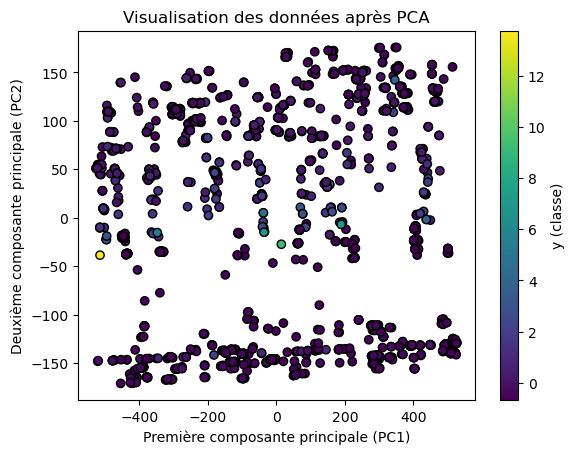

In [26]:
for i in var_num:
    x[i].fillna(x[i].mean(), inplace=True)
for i in var_cat:
    x[i].fillna(x[i].mode()[0], inplace=True)

label_encoder = LabelEncoder()
scaler=StandardScaler()
for i in var_cat:
    x[i] = label_encoder.fit_transform(x[i])
for i in var_num:
    x[i] = (x[i] - x[i].mean()) / x[i].std()
y = (y - y.mean()) / y.std()



print(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

pca = PCA(n_components=2)  # Réduire à 2 dimensions pour visualisation
X_pca = pca.fit_transform(X_train)
# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.colorbar(label='y (classe)')
plt.title('Visualisation des données après PCA')
plt.show




Sur l'ensemble de test :
R² score : 0.599
MSE : 0.339
RMSE : 0.582
Cross-Validation RMSE moyen : 0.686
Top 5 coefficients les plus importants :
               Feature  Coefficient  Absolute_Coefficient
14              Length     0.359800              0.359800
12                Year     0.237191              0.237191
17    Seating Capacity    -0.228385              0.228385
18  Fuel Tank Capacity     0.227746              0.227746
7          Seller Type    -0.177480              0.177480


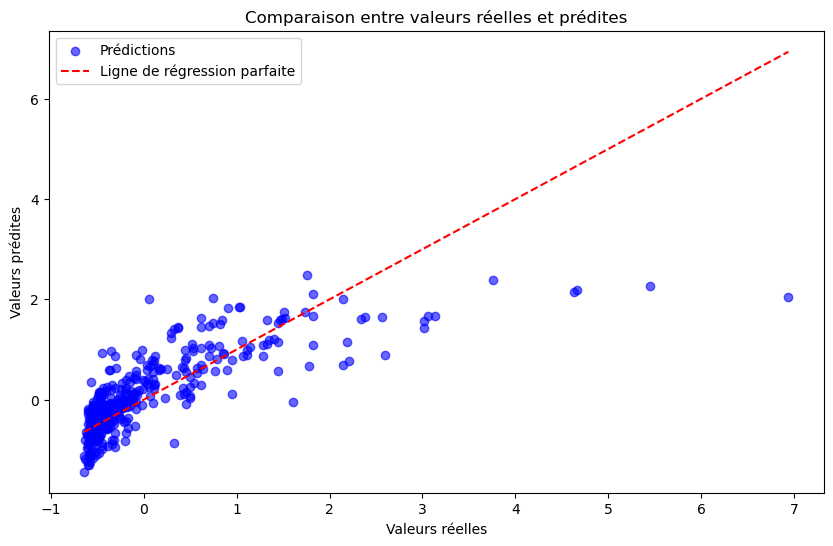

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score


model = LinearRegression()

model.fit(X_train, y_train)


y_pred_test = model.predict(X_test)


print("\nSur l'ensemble de test :")
print(f"R² score : {r2_score(y_test, y_pred_test):.3f}")
print(f"MSE : {mean_squared_error(y_test, y_pred_test):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_test)):.3f}")
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)  # Calcul du RMSE à partir du MSE
print(f"Cross-Validation RMSE moyen : {cv_rmse.mean():.3f}")




coef_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_,
    'Absolute_Coefficient': abs(model.coef_)
})


coef_importance = coef_importance.sort_values('Absolute_Coefficient', ascending=False)


n = 5  
print("Top", n, "coefficients les plus importants :")
print(coef_importance.head(n))


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Prédictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ligne de régression parfaite')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison entre valeurs réelles et prédites')
plt.legend()
plt.show()





maintenant passons a la creation du meme model mais a la main avec numpy 

In [5]:
def Model(X,tetha):
    return X * tetha


Sur l'ensemble de test avec Random Forest :
R² score : 0.906
MSE : 0.058
RMSE : 0.242


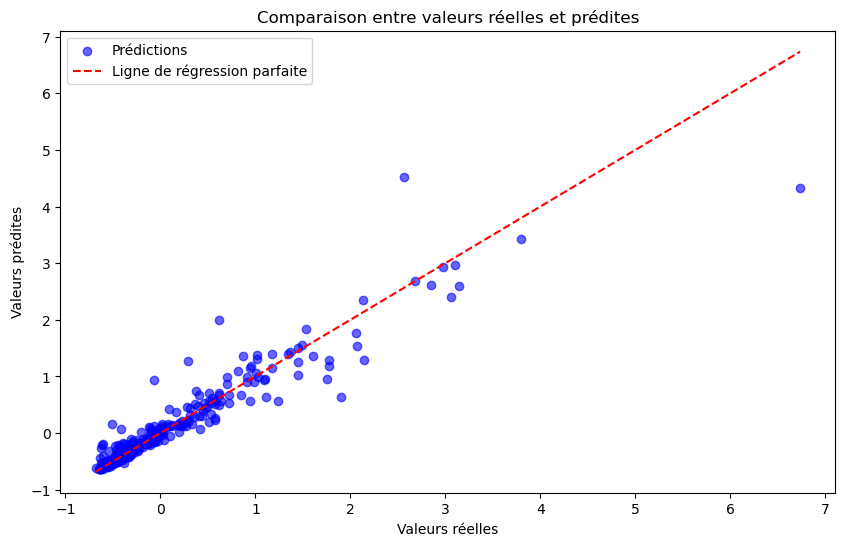

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("\nSur l'ensemble de test avec Random Forest :")
print(f"R² score : {r2_score(y_test, y_pred_rf):.3f}")
print(f"MSE : {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")



import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Prédictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ligne de régression parfaite')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison entre valeurs réelles et prédites')
plt.legend()
plt.show()



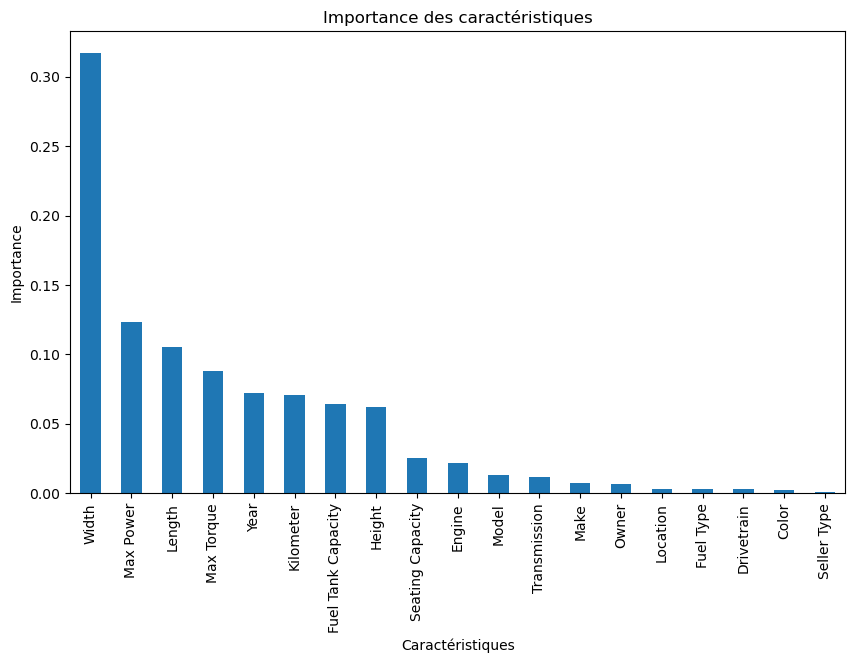

In [210]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Importance des caractéristiques')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.show()


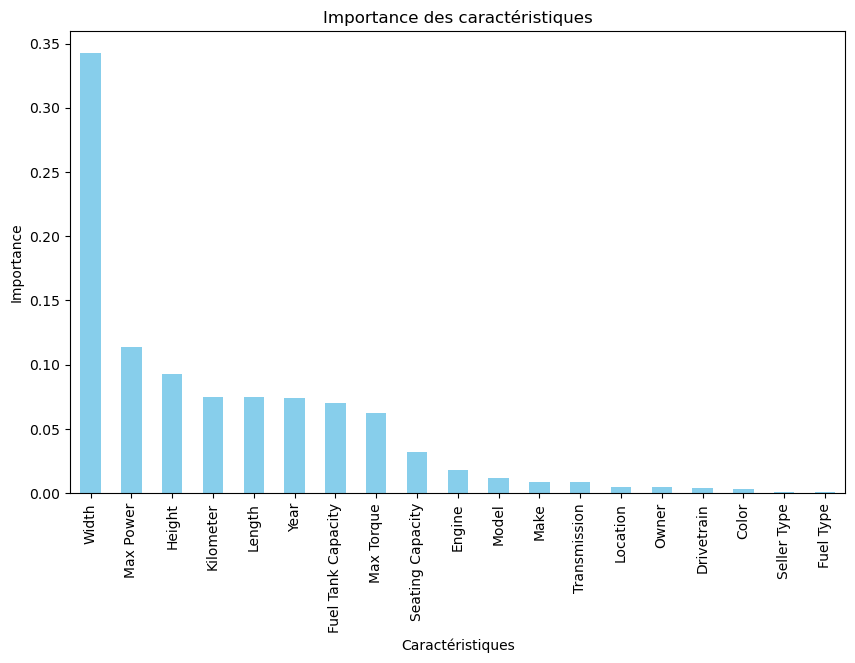

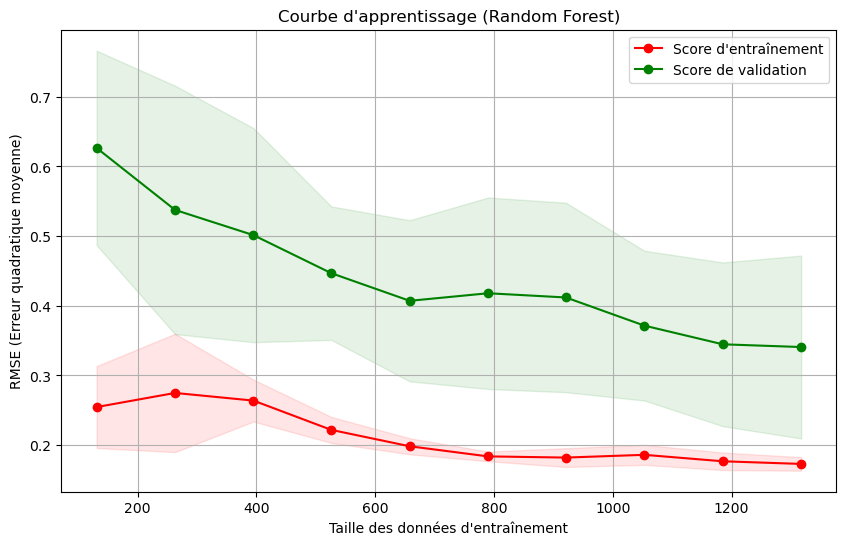

In [7]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


train_sizes = np.linspace(0.1, 1.0, 10)  
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42) 

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring="neg_root_mean_squared_error"
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.title("Courbe d'apprentissage (Random Forest)")
plt.xlabel("Taille des données d'entraînement")
plt.ylabel("RMSE (Erreur quadratique moyenne)")
plt.legend(loc="best")
plt.grid()
plt.show()



Sur l'ensemble de test avec Decision Tree :
R² score : 0.802
MSE : 0.123
RMSE : 0.351


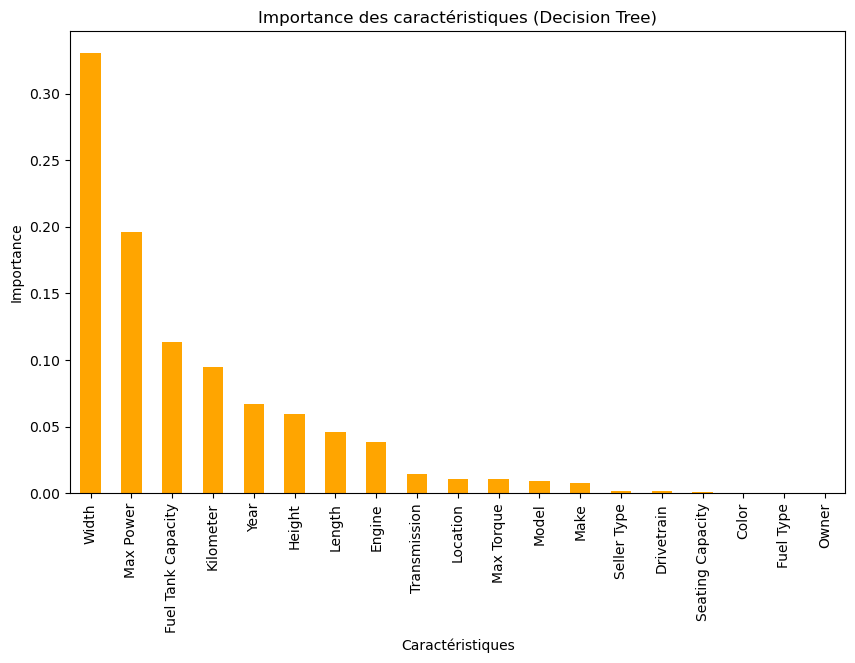

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Création du modèle de régression avec un arbre de décision
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # Vous pouvez ajuster `max_depth`

# Entraînement du modèle
dt_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_dt = dt_model.predict(X_test)

# Évaluation des performances
print("\nSur l'ensemble de test avec Decision Tree :")
print(f"R² score : {r2_score(y_test, y_pred_dt):.3f}")
print(f"MSE : {mean_squared_error(y_test, y_pred_dt):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.3f}")

# Importance des caractéristiques
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='orange')
plt.title("Importance des caractéristiques (Decision Tree)")
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()
